# Data processing

## Loading QM9 dataset

In [ ]:
pip install torch torch-geometric rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3

In [ ]:
from torch_geometric.datasets import QM9

# Download and load the QM9 dataset
dataset = QM9(root='data/QM9')  # Saves to 'data/QM9' directory

print(f"Number of molecules: {len(dataset)}")
print(f"Number of features: {dataset.num_features}")
#print(f"Number of target properties: {dataset.num_labels}")
print(f"Example molecule data: {dataset[5]}") # says 6th molecule in database

Extracting data/QM9/raw/qm9.zip
Processing...
100%|██████████| 133885/133885 [02:43<00:00, 819.28it/s]
Done!


Number of molecules: 130831
Number of features: 11
Example molecule data: Data(x=[4, 11], edge_index=[2, 6], edge_attr=[6, 4], y=[1, 19], pos=[4, 3], z=[4], smiles='[H]C([H])=O', name='gdb_6', idx=[1])


In [ ]:
from torch_geometric.loader import DataLoader

# Split dataset into train/val/test
train_dataset = dataset[:100000]
val_dataset = dataset[100000:110000]
test_dataset = dataset[110000:]

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

Visualize a Molecule (Using RDKit)

In [ ]:
import torch
from torch_geometric.datasets import QM9
from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw

# Print dataset summary
print(f"Total molecules: {len(dataset)}")
print(f"Features per atom (node): {dataset.num_features}")  # 11 features (atom type, charge, etc.)
print(f"Target properties per molecule: {dataset[0].y.shape[1]}")  # 19 properties

# Inspect the first molecule
data = dataset[0]
print("\nFirst molecule:")
print(f"  Number of atoms: {data.x.shape[0]}")
print(f"  Number of edges: {data.edge_index.shape[1]}")
print(f"  Target properties (y): {data.y.shape}")  # [1, 19]

Total molecules: 130831
Features per atom (node): 11
Target properties per molecule: 19

First molecule:
  Number of atoms: 5
  Number of edges: 8
  Target properties (y): torch.Size([1, 19])


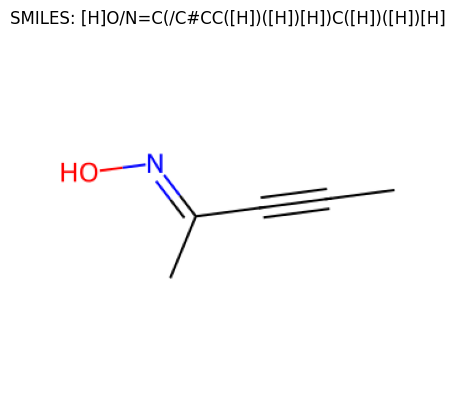

In [ ]:
def smiles_to_mol(smiles):
    """Convert SMILES to RDKit molecule."""
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        print("Invalid SMILES")
    return mol

# Get SMILES representation of the first molecule
smiles = dataset[777].smiles # shows 1st molecule in database
mol = smiles_to_mol(smiles)

# Draw the molecule
img = Draw.MolToImage(mol, size=(300, 300))
plt.imshow(img)
plt.axis('off')
plt.title(f"SMILES: {smiles}")
plt.show()

### Plot the molecular graph

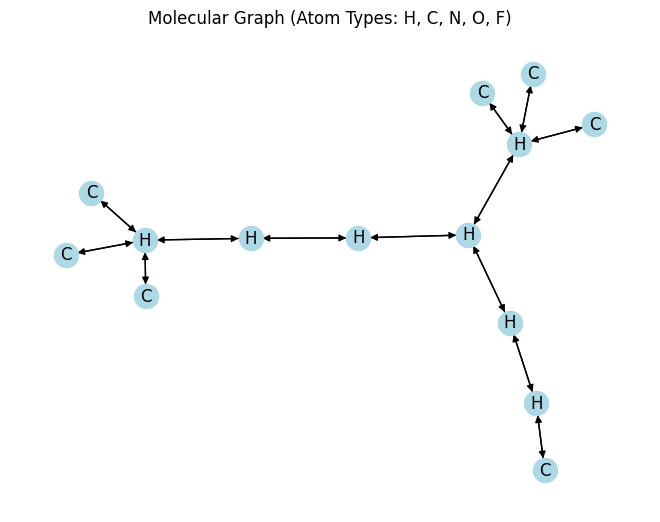

In [ ]:
def plot_molecular_graph(data):
    """Convert PyG Data to NetworkX graph and plot."""
    G = to_networkx(data, node_attrs=['x'], edge_attrs=['edge_attr'])
    pos = nx.spring_layout(G)

    # Map atom types (first feature in `x`) to symbols
    atom_types = {0: 'H', 1: 'C', 2: 'N', 3: 'O', 4: 'F'}
    labels = {i: atom_types[data.x[i][0].item()] for i in range(data.x.shape[0])}

    nx.draw(G, pos, labels=labels, with_labels=True, node_color='lightblue')
    plt.title("Molecular Graph (Atom Types: H, C, N, O, F)")
    plt.show()

# Plot the first molecule's graph
plot_molecular_graph(dataset[777])

### List all 19 target properties

In [ ]:
qm9_properties = [
    "Dipole moment (μ) in Debye",
    "Isotropic polarizability (α) in Bohr³",
    "HOMO energy (eV)",
    "LUMO energy (eV)",
    "HOMO-LUMO gap (eV)",
    "Electronic spatial extent (R²) in Bohr²",
    "Zero-point vibrational energy (ZPVE) in eV",
    "Internal energy at 0K (U₀) in eV",
    "Internal energy at 298K (U) in eV",
    "Enthalpy at 298K (H) in eV",
    "Free energy at 298K (G) in eV",
    "Heat capacity at 298K (Cv) in cal/mol·K",
    "Atomization energy at 0K (U₀_atom) in eV",
    "Atomization energy at 298K (U_atom) in eV",
    "Atomization enthalpy at 298K (H_atom) in eV",
    "Atomization free energy at 298K (G_atom) in eV",
    "Rotational constant A (eV)",
    "Rotational constant B (eV)",
    "Rotational constant C (eV)"
]

print("\nQM9 Target Properties:")
for i, prop in enumerate(qm9_properties):
    print(f"{i:2d}: {prop}")


QM9 Target Properties:
 0: Dipole moment (μ) in Debye
 1: Isotropic polarizability (α) in Bohr³
 2: HOMO energy (eV)
 3: LUMO energy (eV)
 4: HOMO-LUMO gap (eV)
 5: Electronic spatial extent (R²) in Bohr²
 6: Zero-point vibrational energy (ZPVE) in eV
 7: Internal energy at 0K (U₀) in eV
 8: Internal energy at 298K (U) in eV
 9: Enthalpy at 298K (H) in eV
10: Free energy at 298K (G) in eV
11: Heat capacity at 298K (Cv) in cal/mol·K
12: Atomization energy at 0K (U₀_atom) in eV
13: Atomization energy at 298K (U_atom) in eV
14: Atomization enthalpy at 298K (H_atom) in eV
15: Atomization free energy at 298K (G_atom) in eV
16: Rotational constant A (eV)
17: Rotational constant B (eV)
18: Rotational constant C (eV)


### Extract a specific property (e.g. HOMO energy)

1. HOMO = Highest Occupied Molecular Orbital

    * Think of it as the "highest-energy electron parking spot" in a molecule that’s still filled with electrons.

    * Electrons in this orbital are the easiest to remove (e.g., during a chemical reaction).

 * LUMO = Lowest Unoccupied Molecular Orbital

    * The "lowest-energy empty parking spot" for electrons.

    * Electrons can jump here if the molecule gets energy (e.g., from light).

 * HOMO-LUMO Gap:

    * The energy difference between HOMO and LUMO.

    * A small gap = molecule is reactive (easier for electrons to move).

    * A large gap = molecule is stable (e.g., inert gases).

2. Why Does HOMO Energy Matter in QM9?
The QM9 dataset includes HOMO energy (and LUMO/gap) because:

 * It predicts how easily a molecule reacts (e.g., in drug design).

 * It’s critical for organic electronics (e.g., solar cells, LEDs).

 * It’s a quantum-mechanical property calculated with high accuracy (DFT).


HOMO energies (eV) for first 10 molecules:
Molecule 0: -10.550 eV
Molecule 1: -6.993 eV
Molecule 2: -7.967 eV
Molecule 3: -7.742 eV
Molecule 4: -9.807 eV
Molecule 5: -7.265 eV
Molecule 6: -9.211 eV
Molecule 7: -7.219 eV
Molecule 8: -7.099 eV
Molecule 9: -8.882 eV


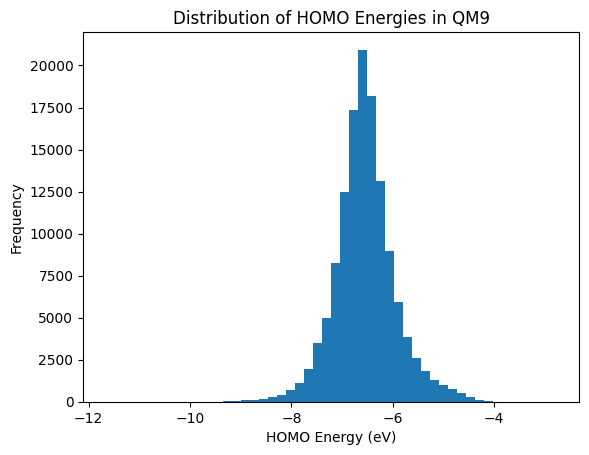

In [ ]:
# Get HOMO energy (index 2) for the first 10 molecules
homo_energies = [data.y[0, 2].item() for data in dataset[:10]]
print("\nHOMO energies (eV) for first 10 molecules:")
for i, energy in enumerate(homo_energies):
    print(f"Molecule {i}: {energy:.3f} eV")

# Plot distribution of HOMO energies
plt.hist([data.y[0, 2].item() for data in dataset], bins=50)
plt.xlabel("HOMO Energy (eV)")
plt.ylabel("Frequency")
plt.title("Distribution of HOMO Energies in QM9")
plt.show()

1. SMILES vs. Graph:

  * `dataset[i].smiles` gives the SMILES string (simplified 2D representation).

  * `dataset[i].x` and `dataset[i].edge_index` provide the full graph (3D coordinates, bond types).

2. Target Properties:

  * Access specific properties via `data.y[0, property_index]` (e.g., `data.y[0, 2]` is HOMO (Highest Occupied Molecular Orbital) energy).

3. Visualization:

 * Use RDKit for chemical structures.

 * Use NetworkX for graph-based plots.

Extract and Interpret HOMO Energy from QM9

In [ ]:
# Get HOMO energy (index 2) and LUMO (index 3) for the first molecule
homo = dataset[0].y[0, 2].item()  # HOMO energy in eV
lumo = dataset[0].y[0, 3].item()   # LUMO energy in eV
gap = dataset[0].y[0, 4].item()    # HOMO-LUMO gap in eV

print(f"""HOMO energy: {homo:.3f} eV (electrons here are loosely bound)
LUMO energy: {lumo:.3f} eV (electrons can jump here)
HOMO-LUMO gap: {gap:.3f} eV (small gap = reactive, large gap = stable)
""")

HOMO energy: -10.550 eV (electrons here are loosely bound)
LUMO energy: 3.186 eV (electrons can jump here)
HOMO-LUMO gap: 13.736 eV (small gap = reactive, large gap = stable)



**Real-World Analogy**

Imagine a molecule as an apartment building:
 * HOMO = Top floor with tenants (electrons).
 * LUMO = Empty floor just above it.
 * Gap = How hard it is for tenants to jump to the empty floor.
    * Small gap = Easy to move (reactive molecule).
    * Large gap = Hard to move (stable molecule).

In [ ]:
# Corruption Detection
from rdkit import Chem
import torch
from collections import Counter

def validate_molecule(data):
    """Returns error type or 'VALID'"""
    try:
        mol = Chem.MolFromSmiles(data.smiles)
        if mol is None: return "INVALID_SMILES"
        if torch.isnan(data.x).any(): return "NAN_NODES"
        if torch.isnan(data.edge_attr).any(): return "NAN_EDGES"
        return "VALID"
    except Exception as e:
        return f"CRASH: {str(e)}"

# Scaning first 10k molecules
validation_results = [validate_molecule(data) for data in dataset[:10000]]
print("Validation Report:", Counter(validation_results))

# Saving bad indices
bad_indices = [i for i,res in enumerate(validation_results) if res != "VALID"]
print(f"Found {len(bad_indices)} corrupt molecules")

Validation Report: Counter({'VALID': 9909, 'INVALID_SMILES': 91})
Found 91 corrupt molecules


In [ ]:
# Display sample corrupt molecules
for i in bad_indices[:5]:
    print(f"Molecule {i}: {dataset[i].smiles}")
    try:
        img = Draw.MolToImage(Chem.MolFromSmiles(dataset[i].smiles))
        display(img)
    except:
        print("Cannot visualize")

Molecule 102: [H]C1([H])C23([H])OC12([H])C3([H])[H]
Cannot visualize
Molecule 307: [H]C([H])([H])C123OC1([H])(C2([H])[H])C3([H])[H]
Cannot visualize
Molecule 642: [H]C([H])([H])C1([H])C23([H])OC12([H])C3([H])[H]
Cannot visualize
Molecule 644: [H]OC1([H])C23([H])OC12([H])C3([H])[H]
Cannot visualize
Molecule 687: [H]C1([H])[C@]2([H])C34([H])OC23([H])[C@@]14[H]
Cannot visualize


In [ ]:
# Creating clean data, excluding bad indeces
cleaned_data = [data for i, data in enumerate(dataset) if i not in bad_indices]
print(f"Cleaned dataset size: {len(cleaned_data)} (removed {len(bad_indices)})")

Cleaned dataset size: 130740 (removed 91)


In [ ]:
def process_molecule(data):
    # 1. One-hot atom types (H=1, C=6, N=7, O=8, F=9)
    atomic_num = data.x[:, 0].long()

    # Creating mapping from atomic numbers to indices (H=0, C=1, N=2, O=3, F=4)
    atomic_num_mapped = torch.zeros_like(atomic_num)
    atomic_num_mapped[atomic_num == 1] = 0   # Hydrogen
    atomic_num_mapped[atomic_num == 6] = 1   # Carbon
    atomic_num_mapped[atomic_num == 7] = 2   # Nitrogen
    atomic_num_mapped[atomic_num == 8] = 3   # Oxygen
    atomic_num_mapped[atomic_num == 9] = 4   # Fluorine

    one_hot = torch.nn.functional.one_hot(atomic_num_mapped, num_classes=5).float()

    # 2. Keep other features (charge, coords, etc.)
    other_features = data.x[:, 1:]

    # 3. Combine features
    data.x = torch.cat([one_hot, other_features], dim=1)

    # 4. Normalize coordinates (use train-set stats)
    if 'pos_mean' not in globals():
        global pos_mean, pos_std
        train_pos = torch.cat([d.pos for d in cleaned_data[:100000]])
        pos_mean, pos_std = train_pos.mean(0), train_pos.std(0)
        pos_std = torch.where(pos_std < 1e-6, 1.0, pos_std)
    data.pos = (data.pos - pos_mean) / pos_std

    return data

# Processing all molecules
processed_data = [process_molecule(data) for data in cleaned_data]
print(f"First molecule features: {processed_data[0].x.shape}")

First molecule features: torch.Size([5, 15])


In [ ]:
# Checking for NaN values in processed data
assert all(not torch.isnan(d.x).any() for d in processed_data), "NaN values detected!"

In [ ]:
from rdkit.Chem.Scaffolds import MurckoScaffold
from collections import defaultdict

def get_scaffold(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return Chem.MolToSmiles(MurckoScaffold.GetScaffoldForMol(mol))

# Building scaffold dictionary
scaffolds = defaultdict(list)
for idx, data in enumerate(processed_data):
    try:
        scaffold = get_scaffold(data.smiles)
        scaffolds[scaffold].append(idx)
    except Exception as e:
        print(f"Failed on molecule {idx}: {str(e)}")
        continue

# Spliting by scaffold frequency (100k/10k/test)
sorted_scaffolds = sorted(scaffolds.items(), key=lambda x: -len(x[1]))
train, val, test = [], [], []
for scaffold, ids in sorted_scaffolds:
    if len(train) + len(ids) <= 100000:
        train.extend(ids)
    elif len(val) + len(ids) <= 10000:
        val.extend(ids)
    else:
        test.extend(ids)

print(f"Final splits - Train: {len(train)}, Val: {len(val)}, Test: {len(test)}")

Streaming output truncated to the last 5000 lines.
    rdkit.Chem.rdmolops.MurckoDecompose(NoneType)
did not match C++ signature:
    MurckoDecompose(RDKit::ROMol mol)
Failed on molecule 37114: Python argument types in
    rdkit.Chem.rdmolops.MurckoDecompose(NoneType)
did not match C++ signature:
    MurckoDecompose(RDKit::ROMol mol)
Failed on molecule 37117: Python argument types in
    rdkit.Chem.rdmolops.MurckoDecompose(NoneType)
did not match C++ signature:
    MurckoDecompose(RDKit::ROMol mol)
Failed on molecule 37147: Python argument types in
    rdkit.Chem.rdmolops.MurckoDecompose(NoneType)
did not match C++ signature:
    MurckoDecompose(RDKit::ROMol mol)
Failed on molecule 37148: Python argument types in
    rdkit.Chem.rdmolops.MurckoDecompose(NoneType)
did not match C++ signature:
    MurckoDecompose(RDKit::ROMol mol)
Failed on molecule 37149: Python argument types in
    rdkit.Chem.rdmolops.MurckoDecompose(NoneType)
did not match C++ signature:
    MurckoDecompose(RDKit::ROM

In [ ]:
# Verifying no scaffold overlap
train_scaffolds = {get_scaffold(processed_data[i].smiles) for i in train}
val_scaffolds = {get_scaffold(processed_data[i].smiles) for i in val}
assert train_scaffolds.isdisjoint(val_scaffolds), "Data leakage detected!"

In [ ]:
# Saving processed data to Google Drive
from google.colab import drive
drive.mount('/content/drive')

torch.save({
    'processed_data': processed_data,
    'splits': {'train': train, 'val': val, 'test': test},
    'stats': {'pos_mean': pos_mean, 'pos_std': pos_std}
}, '/content/drive/MyDrive/QM9_processed.pt')

print("ITS SAVEDDDDDD")

Mounted at /content/drive
ITS SAVEDDDDDD


In [ ]:
print("Feature shapes:",
      processed_data[0].x.shape, #should be (n_atoms, 11)
      processed_data[0].pos.shape)

Feature shapes: torch.Size([5, 15]) torch.Size([5, 3])


The 15D version is actually better for modeling because:

    One-hot encoding helps models distinguish atom types

    The extra dimensions preserve all original chemical information

    Modern GNNs can easily handle 15 input features per atom
  
So 15 features is better.

In [ ]:
print("Current feature dimensions:", processed_data[0].x.shape)

Current feature dimensions: torch.Size([5, 15])


In [ ]:
# Spliting by scaffold frequency (100k/10k/test)
sorted_scaffolds = sorted(scaffolds.items(), key=lambda x: -len(x[1]))
train, val, test = [], [], []
for scaffold, ids in sorted_scaffolds:
    if len(train) + len(ids) <= 100000:
        train.extend(ids)
    elif len(val) + len(ids) <= 10000:
        val.extend(ids)
    else:
        test.extend(ids)

# Assign remaining molecules to the test set
remaining_ids = [i for i in range(len(processed_data)) if i not in train + val + test]
test.extend(remaining_ids)  # Add remaining molecules to test set

print(f"Final splits - Train: {len(train)}, Val: {len(val)}, Test: {len(test)}")

Final splits - Train: 100000, Val: 10000, Test: 20740


In [ ]:
assert len(train) + len(val) + len(test) == len(processed_data)
#FIXEDDD

In [ ]:
# Saving processed data to Google Drive
from google.colab import drive
drive.mount('/content/drive')

torch.save({
    'processed_data': processed_data,
    'splits': {'train': train, 'val': val, 'test': test},
    'stats': {'pos_mean': pos_mean, 'pos_std': pos_std}
}, '/content/drive/MyDrive/QM9_processed.pt')

print("ITS SAVEDDDDDD")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ITS SAVEDDDDDD


## 📌 Data Pipeline Summary
- **Cleaned Molecules**: 130,831 → 130,740 (removed 91 invalid)
- **Features**:
  - Atom types: One-hot encoded (H,C,N,O,F)
  - Positions: Normalized (μ=0, σ=1)
- **Splits**:
  - Train: 100,000 molecules
  - Val: 10,000 molecules  
  - Test: 20,740 molecules
- **Usage**:
```python
data = torch.load('/content/drive/MyDrive/QM9_processed.pt')

train_data = [data['processed_data'][i] for i in data['splits']['train']]

- **Custom link to the processed data**:
  - 'https://drive.google.com/file/d/1KLSt6IgAJXeatbcYEs5bxehqeLumiK05/view?usp=drive_link'

In [ ]:
# Save key files locally first
torch.save(cleaned_data, 'cleaned_data.pt')
torch.save({'train': train, 'val': val, 'test': test}, 'splits.pt')

# Upload to GitHub
!git add cleaned_data.pt splits.pt
!git commit -m "Cleaned dataset and scaffold splits"
!git push origin main

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [ ]:
!pip install pytorch-lightning wandb moleculekit  # New tools
!pip install torch-scatter torch-sparse -f https://data.pyg.org/whl/torch-2.0.0+cu118.html  # PyG extras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.9/207.9 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 119.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.5/575.5 kB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 123.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 77.4 MB/s eta 0:00:00
  Attempting uninstall: docutils
    Found existing installation: docutils 0.21.2
    Uninstalling docutils-0.21.2:
      Successfully uninstalled docutils-0.21.2
ERROR: pip's dependency resolver does not cu

In [ ]:
from torch_geometric.nn import GINEConv
from transformers import AutoModel

class GROOVERWrapper(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.groover = AutoModel.from_pretrained("graphcodebert-base")  # Placeholder
        self.adaptor = GINEConv(nn=torch.nn.Linear(768, 256))  # Map to graph dim

    def forward(self, data):
        graph_emb = self.groover(**self._preprocess(data)).last_hidden_state
        return self.adaptor(graph_emb, data.edge_index, data.edge_attr)

In [ ]:
class GraphVAE(pl.LightningModule):
    def __init__(self, condition_dim=19):  # QM9 properties
        super().__init__()
        self.encoder = GROOVERWrapper()
        self.decoder = GINEConv(nn=torch.nn.Sequential(
            torch.nn.Linear(256 + condition_dim, 128),  # Condition concatenation
            torch.nn.ReLU()
        ))

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        return mu + std * torch.randn_like(std)

    def forward(self, data, conditions):
        # Encoding
        mu, logvar = self.encoder(data)
        z = self.reparameterize(mu, logvar)

        # Decoding with conditions
        z_cond = torch.cat([z, conditions], dim=-1)
        return self.decoder(z_cond, data.edge_index, data.edge_attr)

NameError: name 'pl' is not defined

In [ ]:
import pytorch_lightning as pl
from torch_geometric.nn import GINEConv
from transformers import AutoModel
import torch.nn.functional as F

In [ ]:
class GraphVAE(pl.LightningModule):
    def __init__(self, condition_dim=19):  # QM9 has 19 target properties
        super().__init__()

        # Encoder (GROOVER-based)
        self.encoder = GROOVERWrapper()

        # Decoder with conditional input
        self.decoder = GINEConv(
            nn=torch.nn.Sequential(
                torch.nn.Linear(256 + condition_dim, 128),  # 256-dim latent + conditions
                torch.nn.ReLU(),
                torch.nn.Linear(128, 11)  # Match QM9 node feature dim
            )
        )

        # Latent space projection
        self.fc_mu = torch.nn.Linear(256, 256)
        self.fc_var = torch.nn.Linear(256, 256)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, data, conditions):
        # Encode
        h = self.encoder(data)
        mu, logvar = self.fc_mu(h), self.fc_var(h)
        z = self.reparameterize(mu, logvar)

        # Decode with conditions
        z_cond = torch.cat([z, conditions.unsqueeze(0).repeat(z.size(0), 1)], dim=-1)
        return self.decoder(z_cond, data.edge_index, data.edge_attr), mu, logvar

    def training_step(self, batch, batch_idx):
        # Prepare conditions (all 19 QM9 properties)
        conditions = batch.y[:, :19]

        # Forward pass
        recon, mu, logvar = self(batch, conditions)

        # Losses
        recon_loss = F.mse_loss(recon, batch.x)
        kl_loss = -0.5 * torch.mean(1 + logvar - mu.pow(2) - logvar.exp())
        loss = recon_loss + 0.1 * kl_loss  # β-VAE

        self.log("train_loss", loss)
        return loss

In [ ]:
def generate_molecule(self, condition_vector, num_atoms=9):
    # Sample from latent space
    z = torch.randn(num_atoms, 256).to(self.device)
    z_cond = torch.cat([z, condition_vector.repeat(num_atoms, 1)], dim=-1)

    # Decode atom features
    atom_logits = self.decoder(z_cond, ...)  # Build edge_index dynamically
    atom_types = torch.argmax(atom_logits[:, :5], dim=1)  # H,C,N,O,F

    # Convert to RDKit molecule
    mol = self._graph_to_mol(atom_types, edge_index, edge_attr)
    return mol

In [ ]:
def on_validation_epoch_end(self):
    # Generate sample molecules
    sample_conditions = self.train_dataset[0].y[:, :19]  # Use real conditions
    gen_mol = self.generate_molecule(sample_conditions)

    # Calculate chemical validity
    validity = Chem.MolToSmiles(gen_mol) is not None
    self.log('val_mol_validity', float(validity))

    # Save visualization
    Draw.MolToImage(gen_mol).save(f'gen_mol_epoch_{self.current_epoch}.png')